<a href="https://colab.research.google.com/github/dudushi/NAS_for_TVWW/blob/main/HM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HM1_PCA

In [ ]:
# Remove when printing the PDF.
#%matplotlib widget

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

pd.options.display.max_columns = 200

## 0. Preparation (Setting the Random State)

In [ ]:
kevin_id = 316685
suyash_id = 307798

rs = min(kevin_id, suyash_id)

In [ ]:
np.random.seed(rs)
array = np.random.rand(2,3)
array

array([[0.0126772 , 0.07770922, 0.80987727],
       [0.07571138, 0.37595698, 0.63759749]])

## 1. Exercise 1 (Loading and Preparing the Data)

### 1.1. Store in the variable **df_tot** the df obtained from the csv file.

In [ ]:
dataset_path = '/content/drive/MyDrive/1_HMs_comptuational/HM1/cla4lsp customers.csv'

df_tot = pd.read_csv(dataset_path, sep = '\t')
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Transform the Dt_Customer in Datatype64

df_tot.loc[df_tot.index, 'Dt_Customer'] = pd.to_datetime(df_tot['Dt_Customer'], format='%d-%m-%Y')

<ipython-input-5-75df357e0c2b>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_tot.loc[df_tot.index, 'Dt_Customer'] = pd.to_datetime(df_tot['Dt_Customer'], format='%d-%m-%Y')


### 1.2. create a sub-DFs **workdf**, extracted from df tot, such that it contains 2/3 of the original dataframe’s rows (randomly sampled);

In [ ]:
l_rows = df_tot.shape[0]
l_selected = (l_rows * 2) // 3

# Sampling randomly the rows indexes :
np.random.seed(rs)
random_row_idx = np.random.choice(range(l_rows), l_selected, replace = False)

workdf = df_tot.iloc[random_row_idx]
workdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
385,948,1971,Graduation,Single,10245.0,1,0,2013-05-15,32,4,7,7,6,4,13,3,1,2,2,5,0,0,0,0,0,0,3,11,0
1494,2005,1990,Graduation,Married,35765.0,1,0,2013-12-11,86,22,3,30,0,5,15,2,2,0,4,6,0,0,0,0,0,0,3,11,0
821,1143,1972,Graduation,Married,22063.0,1,0,2013-08-08,43,7,10,13,3,11,11,2,2,0,3,7,0,0,0,0,0,0,3,11,0
1720,6742,1979,Graduation,Married,17688.0,1,0,2013-01-13,82,2,2,1,3,1,2,1,1,0,2,8,0,0,0,0,0,1,3,11,0
1453,5975,1967,PhD,Single,40304.0,1,0,2013-09-30,82,37,0,17,0,0,3,1,2,0,3,7,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,5117,1963,2n Cycle,Married,32632.0,0,0,2012-08-02,32,63,151,137,153,19,53,2,4,4,8,5,0,0,0,0,0,0,3,11,0
2077,954,1960,Basic,Widow,22123.0,0,0,2014-03-27,77,3,3,24,34,7,31,1,2,1,3,5,0,0,0,0,0,0,3,11,0
669,7426,1971,2n Cycle,Married,54690.0,1,1,2013-11-07,76,111,16,37,7,9,18,3,3,1,5,3,0,0,0,0,0,0,3,11,0
1516,1490,1962,Graduation,Married,55759.0,0,1,2012-11-28,84,675,0,85,10,7,77,5,10,3,8,8,0,0,0,0,0,0,3,11,0


### 1.3. let us denote (see Appendix A) with:
>• **labels**: the columns NumDealsPurchases, AcceptedCmp1, ..., AcceptedCmp5, Re- sponse, Complain, Recency; <br>
>• **features**: all the other ones, except for ID, Z CostComtact, and Z revenue (i.e., discard these columns).

In [ ]:
label_columns = ['NumDealsPurchases',
                 'AcceptedCmp1',
                 'AcceptedCmp2',
                 'AcceptedCmp3',
                 'AcceptedCmp4',
                 'AcceptedCmp5',
                 'Response',
                 'Complain',
                 'Recency']

exclude_columns = ['ID',
                   'Z_CostContact',
                   'Z_Revenue']

features_columns = ['Year_Birth',
                    'Education',
                    'Marital_Status',
                    'Income',
                    'Kidhome',
                    'Teenhome',
                    'Dt_Customer',
                    'MntWines',
                    'MntFruits',
                    'MntMeatProducts',
                    'MntFishProducts',
                    'MntSweetProducts',
                    'MntGoldProds',
                    'NumWebPurchases',
                    'NumCatalogPurchases',
                    'NumStorePurchases',
                    'NumWebVisitsMonth']


workdf = workdf.drop(exclude_columns, axis = 1)
#features = workdf[features_columns]
#labels = workdf[label_columns]

### 1.4. Remove randomly from workdf one feature column among the spending habits or the purchasing habits ; <br>
i.e., remove one column among this list:
> _MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumWebPur- chases, NumCatalogPurchases, NumStorePurchases_.

In [ ]:
removable_columns = ['MntWines',
                     'MntFruits',
                     'MntMeatProducts',
                     'MntFishProducts',
                     'MntSweetProducts',
                     'MntGoldProds',
                     'NumWebPurchases',
                     'NumCatalogPurchases',
                     'NumStorePurchases']

np.random.seed(rs)
column_to_drop = np.random.choice(removable_columns)
workdf = workdf.drop(column_to_drop, axis = 1)

Just let keep updated the list of features_columns :

In [ ]:
features_columns.remove(column_to_drop)

### 1.5. Clean the dataset workdf from missing values in the feature columns _(if needed)_.

AOOOOOOOOOO SEE IT AGAIN!

In [ ]:
categorical_cols = workdf.select_dtypes(include = object)
numerical_cols = workdf.select_dtypes(exclude='object')

categorical_missing = categorical_cols.isna().sum()
numerical_missing = numerical_cols.isna().sum()

print('The missing values for the categorical features are :')
print(categorical_missing)
print()
print('The missing values for the numerical features are :')
print(numerical_missing)

The missing values for the categorical features are :
Education         0
Marital_Status    0
dtype: int64

The missing values for the numerical features are :
Year_Birth              0
Income                 20
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


The only missing value are present in the Income feature, and this is just for 20 samples. <br>
In order to avoiding the dirty of the dataset, we decided to remove those 20 samples instead of trying to figure them out.  <br> We prefere fewer samples than more samples but misleading.

In [ ]:
workdf = workdf.dropna()

In [ ]:
features = workdf[features_columns]
labels = workdf[label_columns]

workdf = pd.concat([labels,features],axis=1)

# Now we have an ordered Dataframe with a structure like :
# dataset = [labels|features]

In [ ]:
workdf

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
385,3,0,0,0,0,0,0,0,32,1971,Graduation,Single,10245.0,1,0,2013-05-15,4,7,7,6,13,1,2,2,5
1494,2,0,0,0,0,0,0,0,86,1990,Graduation,Married,35765.0,1,0,2013-12-11,22,3,30,0,15,2,0,4,6
821,2,0,0,0,0,0,0,0,43,1972,Graduation,Married,22063.0,1,0,2013-08-08,7,10,13,3,11,2,0,3,7
1720,1,0,0,0,0,0,0,1,82,1979,Graduation,Married,17688.0,1,0,2013-01-13,2,2,1,3,2,1,0,2,8
1453,1,0,0,0,0,0,0,0,82,1967,PhD,Single,40304.0,1,0,2013-09-30,37,0,17,0,3,2,0,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,2,0,0,0,0,0,0,0,32,1963,2n Cycle,Married,32632.0,0,0,2012-08-02,63,151,137,153,53,4,4,8,5
2077,1,0,0,0,0,0,0,0,77,1960,Basic,Widow,22123.0,0,0,2014-03-27,3,3,24,34,31,2,1,3,5
669,3,0,0,0,0,0,0,0,76,1971,2n Cycle,Married,54690.0,1,1,2013-11-07,111,16,37,7,18,3,1,5,3
1516,5,0,0,0,0,0,0,0,84,1962,Graduation,Married,55759.0,0,1,2012-11-28,675,0,85,10,77,10,3,8,8


## 2. Exercise 2 (Encoding of Categorical Data):

### Analyze and prepare workdf for the PCA. In particular, apply a proper encoding of the categorical features. Once applied the encoding, store into a variable Xworkdf the sub-DF obtained from workdf selecting the feature columns (updated to the new encoding).

In [ ]:
categorical_cols = workdf.select_dtypes(include = object)
categorical_cols

,Education,Marital_Status
385,Graduation,Single
1494,Graduation,Married
821,Graduation,Married
1720,Graduation,Married
1453,PhD,Single
...,...,...
1976,2n Cycle,Married
2077,Basic,Widow
669,2n Cycle,Married
1516,Graduation,Married


We have just two features to encode : let's see the unique values in order to imagine how we can manage these categorical data

In [ ]:
education_unique = workdf['Education'].unique()
mstatus_unique = workdf['Marital_Status'].unique()

education_unique, mstatus_unique

(array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object),
 array(['Single', 'Married', 'Divorced', 'Together', 'Widow', 'YOLO',
        'Absurd', 'Alone'], dtype=object))

By the moment that we have just two features to encode, and, for each features, just some fews values we decided to opt for two possible encoding : <br>
*  The One-Hot Encoding
*  The Ordinal Encoding  <br>

The first one is certainly the easiest and common one. The problem is that it will increase by <br>
> len(education_unique) + len(mstatus_unique) = _13_ <br>

the number of columns. <br>
We would like to avoid this, and the Ordinal Encoding is what could help us. <br>



###**ORDINAL ENCODING**

In order to assign values to the categorical ones, wee need to find an ordinal meaning to each of one. <br>
We thought that given the two features, we could assign a higher number for states (economic and marriage) that socially speaking provide greater economic stability/wealth.
For example the Possible Wealth Scale could be : <br>
<br>
> Education :<br>
{ 'Basic' = 0, 'Graduation' = 1 , '2n Cycle' = 2, 'PhD' = 3, 'Master' = 4  }

> Marital_Status : <br>
{ 'Alone' = 0, 'Single' = 1, 'Together' = 2, 'Married' = 3, 'Divorced' = 4, 'Widow' = 5, 'YOLO' = 6,
        'Absurd' = 7 }

<br>
<br>

Despite this sub-classification, we need to provid in out dataset that this is working. We could do that by veryfing the correlation between these two features and the income :

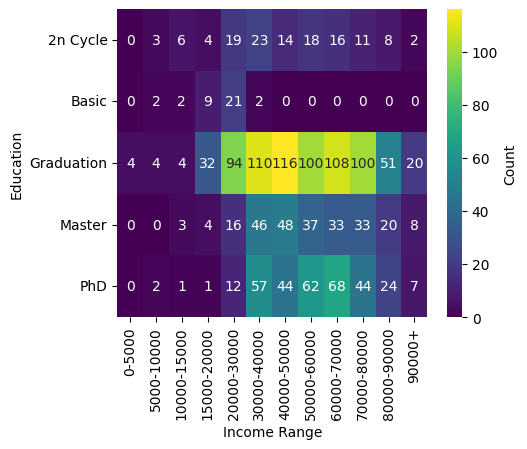

In [ ]:
# @title
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming workdf is your DataFrame
plt.subplots(figsize=(5, 4))

# Define income ranges up to 70000
income_bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 70000, 80000 , 90000 , float('inf')]
income_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000' , '80000-90000','90000+']

df_2dhist = pd.DataFrame()

# Create income range column
df_2dhist['Income_Range'] = pd.cut(workdf['Income'], bins=income_bins, labels=income_labels, right=False)
df_2dhist['Education'] = workdf['Education']

# Create a pivot table for counts
df_2dhist_pivot = df_2dhist.pivot_table(index='Education', columns='Income_Range', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(df_2dhist_pivot, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

# Set labels
plt.xlabel('Income Range')
plt.ylabel('Education')

# Show the plot
plt.show()


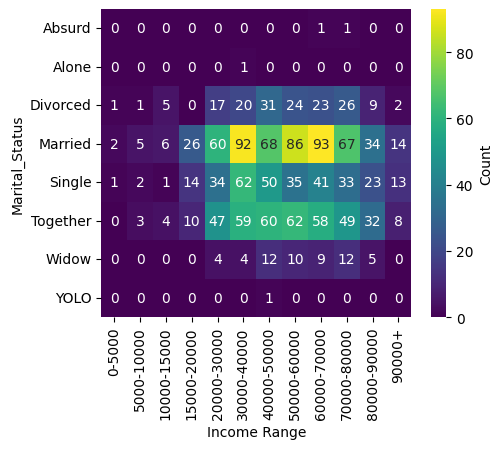

In [ ]:
# @title
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming workdf is your DataFrame
plt.subplots(figsize=(5, 4))

# Define income ranges up to 70000
income_bins = [0, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 70000, 80000 , 90000 , float('inf')]
income_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000' , '80000-90000','90000+']

# Create income range column
df_2dhist['Income_Range'] = pd.cut(workdf['Income'], bins=income_bins, labels=income_labels, right=False)
df_2dhist['Marital_Status'] =  workdf['Marital_Status']

# Create a pivot table for counts
df_2dhist_pivot = df_2dhist.pivot_table(index='Marital_Status', columns='Income_Range', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(df_2dhist_pivot, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

# Set labels
plt.xlabel('Income Range')
plt.ylabel('Marital_Status')

# Show the plot
plt.show()

Unfortunately, as the correlation shows us, somewhat as we expected, the reality is always different from what we expect : <br>
The categories in between such as 'Married' and 'Graduation' (averages over the 'possible wealth' scale set earlier) have the highest 'Incomes'. <br>
This fact shows us that using **Ordinal Ecoding on these categories does not make practical sense** and would lead to our future PCA misinterpreting the data. What we will therefore do is to use One-Hot Encoding and take on the additional 19 columns. <br> <br>

###**ONE-HOT ENCODING**

In [ ]:
Xworkdf = pd.get_dummies(workdf).iloc[:,9:]
for cols in Xworkdf.columns:
  print(f'max of {cols} ꞉ {max(Xworkdf[cols])}')

max of Year_Birth ꞉ 1996
max of Income ꞉ 666666.0
max of Kidhome ꞉ 2
max of Teenhome ꞉ 2
max of Dt_Customer ꞉ 2014-06-29 00:00:00
max of MntWines ꞉ 1493
max of MntFruits ꞉ 197
max of MntMeatProducts ꞉ 1725
max of MntFishProducts ꞉ 259
max of MntGoldProds ꞉ 321
max of NumWebPurchases ꞉ 25
max of NumCatalogPurchases ꞉ 28
max of NumStorePurchases ꞉ 13
max of NumWebVisitsMonth ꞉ 20
max of Education_2n Cycle ꞉ 1
max of Education_Basic ꞉ 1
max of Education_Graduation ꞉ 1
max of Education_Master ꞉ 1
max of Education_PhD ꞉ 1
max of Marital_Status_Absurd ꞉ 1
max of Marital_Status_Alone ꞉ 1
max of Marital_Status_Divorced ꞉ 1
max of Marital_Status_Married ꞉ 1
max of Marital_Status_Single ꞉ 1
max of Marital_Status_Together ꞉ 1
max of Marital_Status_Widow ꞉ 1
max of Marital_Status_YOLO ꞉ 1


## 3. Exercise 3 (Preprocessing and full-PCA):

Preprocess the data, before applying the PCA:

### 3.1 Create two DFs *Xworkdf_std* and *Xworksf_mm*, created using a StandardScaler and a MinMaxScaler (min “ 0, max “ 1), respectively, applied to *Xworkdf*.


Before the normalizing of the data, we have to work with the ['Dt_Customer'] column because it is in the format DataType. <br>
This kind of type is not usable by the StandardScaler() and MinMaxScaler(). <br>
We'll make a transformation : <br>

Xworkdf['Dt_Customer'] --> Xworkdf['Days_Customer'] where for an element $i$ of the dataset : <br> <br>

> $Xworkdf[Days Customer]_i$<br> $ = max(Xworkdf[Dt Customer]) - Xworkdf[Dt Customer]_i $

<br> For simplicity : <br>

> $customer(days)_i$$ = max(date) -$ $customer(date)_i$<br>

In [ ]:
max_date = Xworkdf['Dt_Customer'].values.max()
Xworkdf['Days_Customer'] = (max_date - Xworkdf['Dt_Customer']).dt.days
Xworkdf = Xworkdf.drop('Dt_Customer', axis = 1)

In this way the older is the enrollment in the company the bigger will be the new value situated in ['Days_Customer']. <br> The same meaning is now represented in a different data type !

In [ ]:
stdscaler = StandardScaler()
mmscaler = MinMaxScaler(feature_range=(0,1))

Xworkdf_std = stdscaler.fit_transform(Xworkdf.values)
Xworkdf_mm = mmscaler.fit_transform(Xworkdf.values)

Xworkdf_std = pd.DataFrame(Xworkdf_std, columns = Xworkdf.columns)
Xworkdf_mm = pd.DataFrame(Xworkdf_mm, columns = Xworkdf.columns)

### 3.2 Analyze and comment a comparison of the **variances** of *Xworkdf* with the variances of *Xworkdf_std* and *Xworkdf_mm*. What do you observe from this analysis?

Average variances ꞉ [26528659.238743573, 0.07117851487361439, 1.000679347826087]



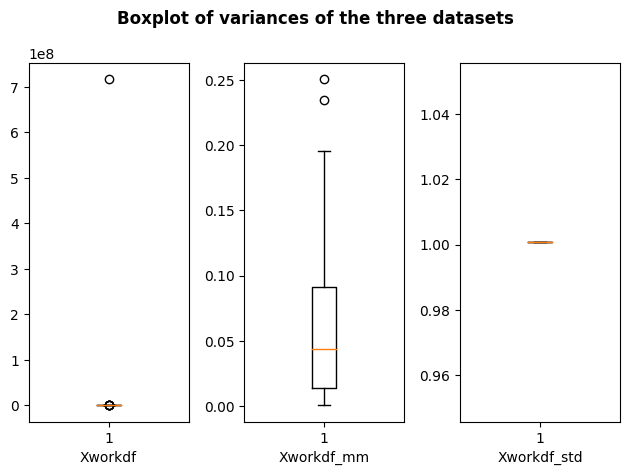

In [ ]:
labels = Xworkdf.columns.tolist()
means = [Xworkdf.var().mean(), Xworkdf_mm.var().mean(), Xworkdf_std.var().mean()]
print("Average variances ꞉ " + str(means))
print('')

fig = plt.figure()
fig.suptitle('Boxplot of variances of the three datasets',fontweight ='bold')

# Let's plot the variance for each feature, for each normalization technique :
plt.subplot(1,3,1)
plt.boxplot(Xworkdf.var())
plt.xticks()
plt.xlabel('Xworkdf')

plt.subplot(1,3,2)
plt.boxplot(Xworkdf_mm.var())
plt.xlabel('Xworkdf_mm')

plt.subplot(1,3,3)
plt.boxplot(Xworkdf_std.var())
plt.xlabel('Xworkdf_std')

plt.tight_layout()
plt.show()

In [ ]:
Xworkdf.var().mean(), Xworkdf_mm.var().mean(), Xworkdf_std.var().mean()

(26528659.238743573, 0.07117851487361439, 1.000679347826087)

When comparing the variances of features in the original dataset, **Xworkdf**, with those in the datasets **Xworkdf_std** (standardized using StandardScaler) and **Xworkdf_mm** (normalized using MinMaxScaler), one observes that the variances in the standardized and normalized datasets are considerably smaller. This reduction in variance is a result of StandardScaler transforming the data to have a mean of 0 and a standard deviation of 1, while MinMaxScaler scales the data between 0 and 1.
<br>
<br>
This analysis leads us to infer that the PCA algorithm may yield improved performance on the standardized or normalized datasets (**Xworkdf_std** and **Xworkdf_mm**) compared to the original dataset (**Xworkdf**). The reason lies in the similarity of variances among features, which enhances the algorithm's ability to identify underlying patterns and trends in the data. Furthermore, standardizing or normalizing the data helps prevent bias in the PCA algorithm towards features with larger variances.

### 3.3 Apply the “full” PCA to the DFs (Xworkdf, Xworkdf std, Xworkdf mm) and plot the curve of the cumulative explained variance. Looking at the results, improve the analysis and comments made at the previous step.

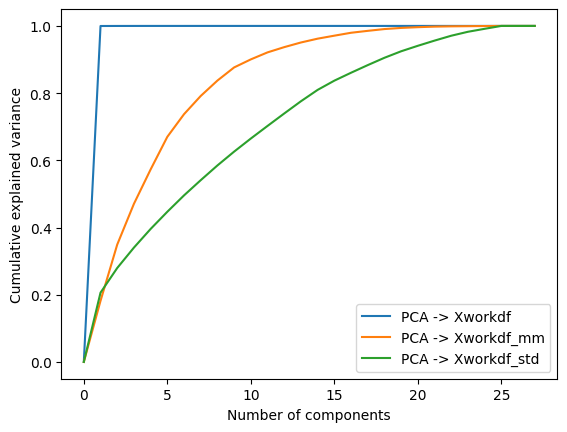

In [ ]:
pca = PCA()
Xworkdf_pca = pca.fit_transform(Xworkdf)

pca_mm = PCA()
Xworkdf_mm_pca = pca_mm.fit_transform(Xworkdf_mm)

pca_std = PCA()
Xworkdf_std_pca = pca_std.fit_transform(Xworkdf_std)

plt.close('all')

#x_values = np.arange(len(pca.explained_variance_ratio_.cumsum()))

# np.insert(array,0,0) needs to insert a 0 in the first value of the cumsum().
# in this way make the plot passing trough the 0.
plt.plot(np.insert(pca.explained_variance_ratio_.cumsum(),0,0),label='PCA -> Xworkdf')
plt.plot(np.insert(pca_mm.explained_variance_ratio_.cumsum(),0,0), label = 'PCA -> Xworkdf_mm')
plt.plot(np.insert(pca_std.explained_variance_ratio_.cumsum(),0,0), label = 'PCA -> Xworkdf_std')

plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.legend()
#plt.xticks(x_values)
plt.show()

The graph provides insight into the amount of information retained by the principal components. <br> <br>
A steeper curve indicates that the initial components capture a significant portion of the dataset's variance. <br> <br>
Specifically, for a given dataset, a steeper curve implies that a smaller number of principal components are needed to preserve substantial information. The point where the curve levels off signifies the number of components required to retain the majority of the dataset's information.
 <br> <br>
Notably, the non-standardized dataset exhibits a steeper curve, primarily attributable to the higher variance observed in certain features. This suggests that the initial principal components in the non-standardized dataset account for a larger share of the overall variance compared to the standardized and normalized counterparts. <br> <br>


In [ ]:
# @title
var_comparison = pd.DataFrame( {
    'Xworkdf.var()': Xworkdf.var(),
    'Xworkdf_mm.var()': Xworkdf_mm.var(),
    'Xworkdf_std.var()': Xworkdf_std.var(),

})
print('Xworkdf')
print('------------------------------------------------------------------')
print('For the non-normalized dataset,')
print('the min-max values of variance are :')
print(f"({var_comparison['Xworkdf.var()'].min()}, {var_comparison['Xworkdf.var()'].max()})")
print('')

print()

print('Xworkdf_mm')
print('------------------------------------------------------------------')
print('For the mm-normalized dataset,')
print('the min-max values of variance are :')
print(f"({var_comparison['Xworkdf_mm.var()'].min()}, {var_comparison['Xworkdf_mm.var()'].max()})")
print('')

print()

print('Xworkdf_std')
print('------------------------------------------------------------------')
print('For the standard-normalized dataset,')
print('the min-max values of variance are :')
print(f"({var_comparison['Xworkdf_std.var()'].min()}, {var_comparison['Xworkdf_std.var()'].max()})")
print('')

Xworkdf
------------------------------------------------------------------
For the non-normalized dataset,
the min-max values of variance are :
(0.000678886625933469, 716056483.2861212)


Xworkdf_mm
------------------------------------------------------------------
For the mm-normalized dataset,
the min-max values of variance are :
(0.000678886625933469, 0.2501503512500369)


Xworkdf_std
------------------------------------------------------------------
For the standard-normalized dataset,
the min-max values of variance are :
(1.0006793478260867, 1.0006793478260876)



The reason we are showing you this data is to give you a better understanding of why Principal Components normalized with the MinMaxScaler() have more information than those normalized with the StandardScaler().
<br><br>
The MinMaxScaler() process limits our data from a minimum of 0 to a maximum of 1, as already explained.
These values, 0 and 1, are the same as our label encoded categorical features.  So we have that the variance for those features will be much greater than for all the others since the values can only be represented by the two extremes.

In [ ]:
# @title
print(var_comparison.loc[['Marital_Status_Married' , 'NumWebPurchases']])

                        Xworkdf.var()  Xworkdf_mm.var()  Xworkdf_std.var()
Marital_Status_Married       0.234640          0.234640           1.000679
NumWebPurchases              7.226903          0.011563           1.000679


As you can see for those two features (one categorical and the other non-categorical), the difference in the variance is pretty high: <br>
> 0.2346 vs 0.0115

For this reason, categorical features, when normalized by the MinMaxScaler() give a preponderant weight in the PCA analysis, which could lead to inaccurate results.

## 4. Exercise 4 (Dimensionality Reduction and Interpretation of the PCs):

Apply the PCA to both _Xworkdf_ std and _Xworkdf mm_, selecting $m$ PCs such that <br>
>$m =  min(m', 5)$ <br>

where $m'$ is the minimum number of PCs that explains 33% of the total variance. <br> Plot the
barplots of percentage of explained variance, with respect to the PCs.